# How to Resample & Interpolate time series data with Python

## Work By - **RAVJOT SINGH**

E-Mail - ravjot313@gmail.com

Website - https://ravjot03.github.io/

LinkedIn - https://www.linkedin.com/in/ravjot03/

GitHub - https://github.com/Ravjot03

Medium - https://medium.com/@ravjot03


## Table of Contents
---
*   Importing necessary libraries
*   Importing and Loading the dataset
*   Dataset Info
*   Knowing the dataset
*   Plotting the sales over time
---
*   Resampling
*   What is Resampling ?
*   Why do we need to resample data ?
---
*   Upsample
*   Monthly => Daily
*   Interpolation - Filling missing values
*   Linear Interpolation
*   Spline Interpolation
*   Pad Interpolation
*   Line Plot
---
*   Downsample


*   Monthly => Quaterly
*   Line Plot-1 
*   Line Plot-2


*   Monthly => Yearly
*   Line Plot
---

*   Summary

---



##Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

##Importing and Loading the dataset

###Dataset Info - 
This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations.

In [2]:
df = pd.read_csv('shampoo.csv', parse_dates=['Month'], index_col='Month')

## Knowing the dataset

In [3]:
df.head()

,Sales
Month,
2018-01-01,266.0
2018-02-01,145.9
2018-03-01,183.1
2018-04-01,119.3
2018-05-01,180.3


In [4]:
#Inspecting the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2018-01-01 to 2020-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [5]:
#Getting summary statistics
df.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


### Plotting the sales over time period

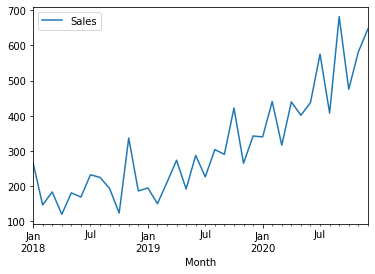

In [6]:
#Plotting the dataset
df.plot()
plt.show()

##Resampling


###What is Resampling ?

Resampling involves changing the frequency of the time series observations.

Two types of resampling are:

1.  Upsampling: Where to `increase` the frequency of the samples, such as from `minutes to seconds`.
2.  Downsampling: Where to `decrease` the frequency of the samples, such as from `days to months`.

In both cases, data must be invented.

In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. 

In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.



### Why do we need to resample data ?

There are perhaps two main reasons why we may be interested in resampling our time series data:

1.  Problem Framing: Resampling may be required if our data is not available at the same frequency that we want to make predictions.
2.  Feature Engineering: Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.
There is a lot of overlap between these two cases.

For example, we may have daily data and want to predict a monthly problem. Then, we could use the daily data directly or we could downsample it to monthly data and develop our model.

A feature engineering perspective may use observations and summaries of observations from both time scales and more in developing a model.

### Upsample

#### Monthly -> Daily

The observations in the Shampoo Sales are monthly.

Imagine we wanted daily sales information. We would have to upsample the frequency from monthly to daily and use an interpolation scheme to fill in the new daily frequency.

The pandas library provides a function called `resample()` on the Series and DataFrame objects. This can be used to group records when downsampling and making space for new observations when upsampling.

We can use this function to transform our monthly dataset into a daily dataset by calling resampling and specifying the preferred frequency of calendar day frequency or “D”.

In [7]:
upsample = df.resample('D').asfreq()
upsample.head(10)

,Sales
Month,
2018-01-01,266.0
2018-01-02,NaN
2018-01-03,NaN
2018-01-04,NaN
2018-01-05,NaN
2018-01-06,NaN
2018-01-07,NaN
2018-01-08,NaN
2018-01-09,NaN


We can see that the `resample()` function has created the rows by putting `NaN` values in the new values.

In [8]:
upsample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1066 entries, 2018-01-01 to 2020-12-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   36 non-null     float64
dtypes: float64(1)
memory usage: 16.7 KB


#### Interpolation - Filling missing values

Next, we can interpolate the missing values at this new frequency.

The Series Pandas object provides an `interpolate()` function to interpolate missing values, and there is a nice selection of simple and more complex interpolation functions.

A good starting point is to use a `linear` interpolation. This draws a straight line between available data, in this case on the first of the month, and fills in values at the chosen frequency from this line.

#####Linear Interpolation

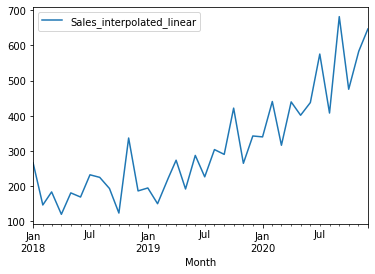

In [9]:
interpolated_linear = upsample.interpolate(method='linear').add_suffix('_interpolated_linear')
interpolated_linear.plot()

Looking at a line plot, we see no difference from plotting the original data as the plot already interpolated the values between points to draw the line.

##### Spline Interpolation

Another common interpolation method is to use a `polynomial` or a `spline` to connect the values.

This creates more curves and can look more natural on many datasets. Using a spline interpolation requires to specify the `order` (number of terms in the polynomial)

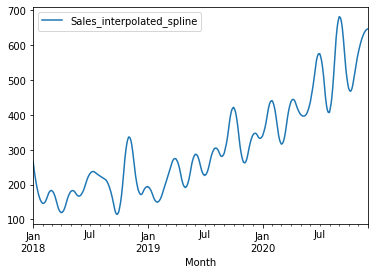

In [10]:
interpolated_spline = upsample.interpolate(method='spline', order=2).add_suffix('_interpolated_spline')
interpolated_spline.plot()

On reviewing the line plot, we can see more natural curves on the interpolated values.

##### Pad Interpolation

Fill in NaNs using existing values

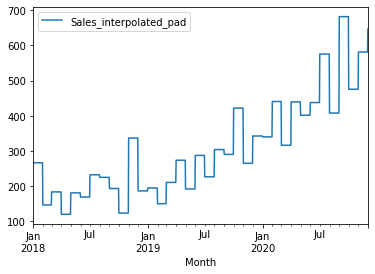

In [11]:
interpolated_pad = upsample.interpolate(method='pad', limit=30).add_suffix('_interpolated_pad')
interpolated_pad.plot()

##### Line Plot

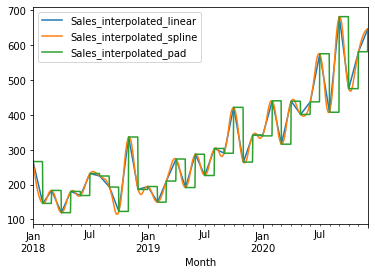

In [12]:
pd.concat([interpolated_linear, interpolated_spline, interpolated_pad], axis=1).plot()

Generally, interpolation is a useful tool when we have missing observations.

### Downsample

#### Monthly -> Quaterly

Next, we will consider resampling in the other direction and decreasing the frequency of observations.

The sales data is monthly, but perhaps we would prefer the data to be quarterly.

The year can be divided into 4 business quarters, 3 months a piece.

Instead of creating new rows between existing observations, the `resample()` function in Pandas will group all observations by the new frequency.

Pandas does have a quarter-aware alias of “Q” that we can use for this purpose.

We must now decide how to create a new quarterly value from each group of 3 records. A good starting point is to calculate the average monthly sales numbers for the quarter. For this, we can use the `mean()` function.

In [13]:
downsample_mean = df.resample('Q').mean().add_suffix('_quaterly_mean')
downsample_mean

,Sales_quaterly_mean
Month,
2018-03-31,198.333333
2018-06-30,156.033333
2018-09-30,216.366667
2018-12-31,215.100000
2019-03-31,184.633333
2019-06-30,250.566667
2019-09-30,273.166667
2019-12-31,342.800000
2020-03-31,365.333333


Plot the quarterly data, showing Q1-Q4 across the 3 years of original observations.



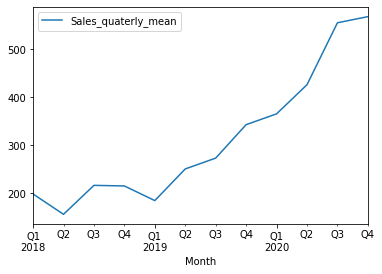

In [14]:
downsample_mean.plot()
plt.show()

Now, we will calculate the median monthly sales numbers for the quarter. For this, we can use the `median()` function.

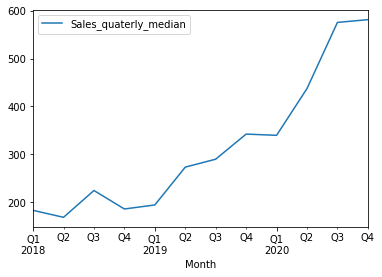

In [15]:
downsample_median = df.resample('Q').median().add_suffix('_quaterly_median')
downsample_median.plot()

Now, we will calculate the total sum monthly sales numbers for the quarter. For this, we can use the `sum()` function.

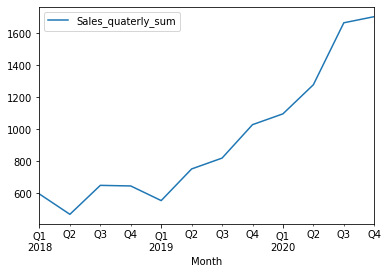

In [16]:
downsample_sum = df.resample('Q').sum().add_suffix('_quaterly_sum')
downsample_sum.plot()

##### Line Plot-1

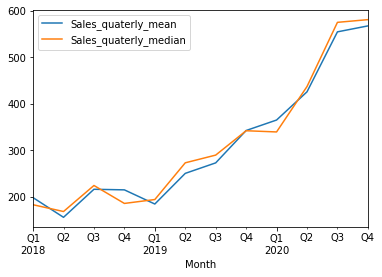

In [17]:
pd.concat([downsample_mean, downsample_median], axis=1).plot()

##### Line Plot-2

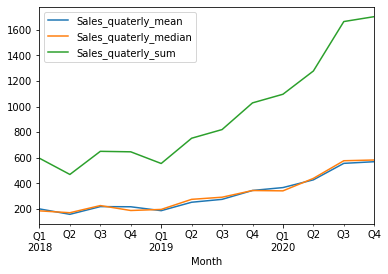

In [18]:
pd.concat([downsample_mean, downsample_median, downsample_sum], axis=1).plot()

#### Monthly -> Yearly

Perhaps we want to go further and turn the monthly data into yearly data, and perhaps later use that to model the following year.

We can downsample the data using the alias “A” for year-end frequency and this time use total average to calculate the total sales each year.

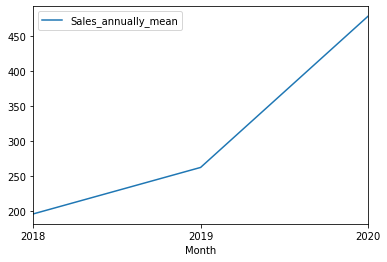

In [19]:
downsample1_mean = df.resample('A').mean().add_suffix('_annually_mean')
downsample1_mean.plot()

Now, we will calculate the median of annual sales. For this, we can use the `median()` function.

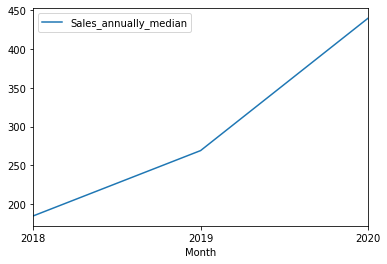

In [20]:
downsample1_median = df.resample('A').median().add_suffix('_annually_median')
downsample1_median.plot()

##### Line Plot

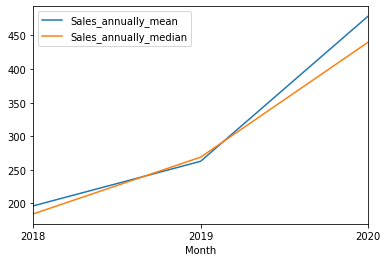

In [21]:
pd.concat([downsample1_mean, downsample1_median], axis=1).plot()

## Summary 
In this notebook, we discovered how to resample our time series data using Pandas in Python.

Specifically, we learned:

About time series resampling and the difference and reasons between downsampling and upsampling observation frequencies.
How to upsample time series data using Pandas and how to use different interpolation schemes.
How to downsample time series data using Pandas and how to summarize grouped data.